# PCA

Steps:

1. Data scaling

2. PCA

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn import decomposition

Load dataset

In [42]:
data = datasets.load_breast_cancer()

Find out the number of features and number of classes

In [43]:
X = data.data
y = data.target
print('num of features: ', data.data.shape) # num of features
print('num of classes: ', np.unique(y).shape) # num of classes

num of features:  (569, 30)
num of classes:  (2,)


Plot the mean value and the variance of each column

In [44]:
mean_X = []
std_X = []

for i in np.arange(0, X.shape[1]):
    mean_X = np.append(mean_X, X[:, i].mean())
    std_X = np.append(std_X, X[:, i].std())

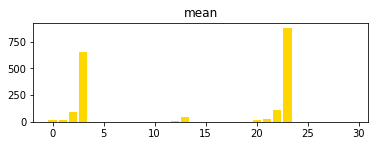

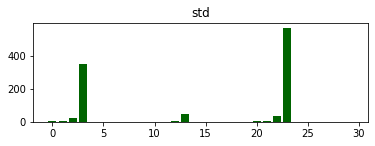

In [45]:
plt.subplot(211)
plt.title('mean')
plt.bar(np.arange(0, len(mean_X)), mean_X, color = 'gold')
plt.show()

plt.subplot(212)
plt.title('std')
plt.bar(np.arange(0, len(std_X)), std_X, color = 'darkgreen')
plt.show()

Standardize (scale) data

In [47]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [54]:
X.mean(axis = 0), X.std(axis = 0)

(array([-3.35603445e-17, -7.96082591e-17, -3.82431833e-17, -2.34141938e-18,
        -4.52674414e-17,  1.20973335e-17, -5.46331190e-18,  5.93159577e-17,
         1.58045808e-16, -7.99984956e-18, -3.98285193e-17, -9.65835496e-18,
         9.72176840e-17,  8.40959795e-17, -5.47550679e-18,  1.47509421e-16,
         1.01461507e-16, -6.63402159e-18,  1.52192260e-17, -1.17070969e-17,
         7.76570762e-17, -4.19504306e-17, -4.68283877e-17,  6.24378502e-17,
         9.67786679e-17,  1.55314152e-16, -1.40485163e-17, -7.45351837e-17,
        -1.85350173e-16, -3.90236564e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Plot mean and std of X scaled

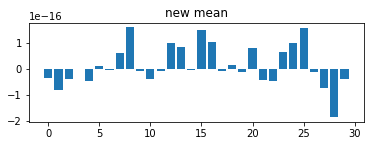

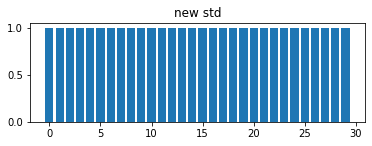

In [55]:
plt.subplot(211)
plt.title('new mean')
plt.bar(np.arange(0, X.shape[1]), X.mean(axis = 0))
plt.show()

plt.subplot(212)
plt.title('new std')
plt.bar(np.arange(0, X.shape[1]), X.std(axis = 0))
plt.show()

PCA

In [57]:
pca = decomposition.PCA(n_components = 2)
pca.fit(X)
X_2_features = pca.transform(X)

In [60]:
X_2_features.shape

(569, 2)

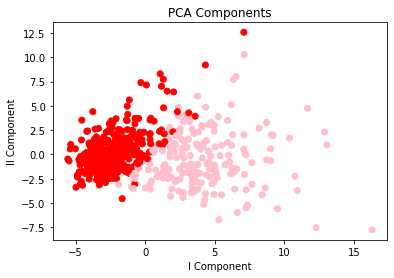

In [66]:
plt.title('PCA Components')
plt.scatter(X_2_features[:, 0], X_2_features[:, 1], c = np.where(y == 1, 'red', 'pink'))
plt.xlabel('I Component')
plt.ylabel('II Component')
plt.show()

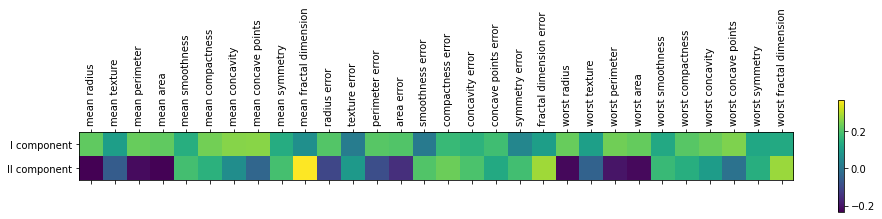

In [74]:
plt.matshow(pca.components_)
plt.xticks(np.arange(0, X.shape[1]), data.feature_names, rotation = 'vertical')
plt.yticks(np.arange(0, 2), ['I component', 'II component'])
plt.colorbar()
plt.show()

In [79]:
# explained variance by PCA components

pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [78]:
# total explained variance

np.sum(pca.explained_variance_ratio_)

0.6324320765155942

In [83]:
# inverse transform - old features values for instace (I = 5, II = 6.7)

pca.inverse_transform([5, 6.7])

array([-0.47233056,  0.1185921 , -0.30402866, -0.44323904,  1.95990572,
        2.21410056,  1.69511034,  1.07132654,  1.96617156,  2.77787239,
        0.32269446,  0.69000401,  0.45726611, -0.00601243,  1.4423413 ,
        2.41116376,  2.08923774,  1.79024144,  1.44427371,  2.38945819,
       -0.33312157,  0.21771573, -0.15598706, -0.34530478,  1.79420196,
        2.01255366,  1.80019723,  1.19910638,  1.56514122,  2.50369415])

In [87]:
# pca.get_covariance()

In [88]:
# If we want to keep, for example at least 80% of information after dimension reduction,
# we can pass the number between 0 and 1 as n_components parameter to PCA,
# and it will determine the number of columns to keep itself

pca_2 = decomposition.PCA(n_components = 0.8)
pca_2.fit(X)
X_80_percent = pca_2.transform(X)

# new dimension

X_80_percent.shape

(569, 5)